In [1]:
from pycalphad import Database, Model, variables as v
from pycalphad import equilibrium, calculate
import numpy as np
from pycalphad.tests.datasets import *
dbf = Database('alzn_mey.tdb')

In [4]:
from pycalphad.core.solver import InteriorPointSolver
class ProblemSaver(InteriorPointSolver):
    saved_problem = [None]
    def solve(self, prob):
        self.saved_problem[0] = prob
        self.verbose = True
        return super(ProblemSaver, self).solve(prob)
#v.T.default_value = 300
eq2 = equilibrium(dbf, ['AL', 'ZN', 'VA'], ['FCC_A1', 'LIQUID', 'HCP_A3'],
                 {v.X('ZN'): 1e-3, v.NP('LIQUID'): 1e-3,
                  v.P: 1e5}, verbose=True, solver=ProblemSaver())
print(eq2)

Components: AL VA ZN
Phases: FCC_A1 
HCP_A3 
LIQUID 
[done]
Composition Sets [CompositionSet(FCC_A1, [ 0.12024048  0.87975952], NP=0.3333333333333333, GM=-10489.356271065852), CompositionSet(HCP_A3, [  1.00000000e-13   1.00000000e+00], NP=0.3333333333333333, GM=-12489.369042323267), CompositionSet(LIQUID, [ 0.00200401  0.99799599], NP=0.001 [fixed], GM=-8422.501520948857)]
Chemical Potentials [ 0.  0.]
length_scale 1e-09
dual_inf 38002.6295168
Trying to improve poor solution
Chemical Potentials [-31859.97373728 -62506.69706511]
[  1.00000000e+00   1.00000000e+05   1.00000000e-03  -1.34150469e-11
   1.16415322e-10   8.59472493e-11   1.00000001e+06   1.00001000e+03
  -8.32846183e-08  -3.78132525e+04   5.03388517e-04]
[  1.00000000e+00   1.00000000e+05   9.32652487e+02   9.99001403e-01
   9.98597132e-04   4.69673376e-04   9.99530327e-01   9.97589548e-01
   2.41045198e-03   9.99000009e-01   1.00000000e-09   1.00000000e-03]
Status: 0 b'Algorithm terminated successfully at a locally optimal 

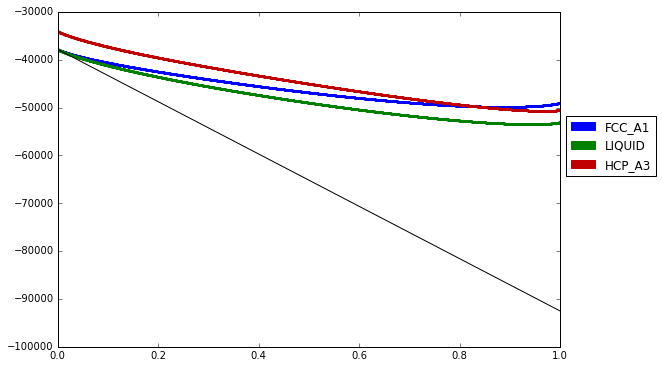

In [5]:
%matplotlib inline
from pycalphad import calculate
from pycalphad.plot.utils import phase_legend
import numpy as np
import matplotlib.pyplot as plt

my_phases = ['FCC_A1', 'LIQUID', 'HCP_A3']
legend_handles, colorlist = phase_legend(my_phases)
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for name in my_phases:
    result = calculate(dbf, ['AL', 'ZN', 'VA'], name, P=101325, T=float(eq2['T'].values.flat[0]), output='GM')
    ax.scatter(result.X.sel(component='ZN'), result.GM,
               marker='.', s=5, color=colorlist[name.upper()])
ax.set_xlim((0, 1))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))

ax.plot([0,1], eq2['MU'].values.flatten(), c='k')
#plt.xlim((0,0.01))
#plt.ylim((-40000, -30000))
plt.show()